In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PyMca5 import specfile  

%matplotlib notebook

## Proceedure

XAS measured in TEY on La_2CuO_4 from M.P.M. Dean et al., Nature Materials 12, 1019–1023 (2013) 

Compute XAS for La_2CuO_4 Density=7.0, Angle=90.deg using
http://henke.lbl.gov/tmp/xray6982.dat

Scale the pre and post edge to the table values and read-off the values at the peak

<IPython.core.display.Javascript object>


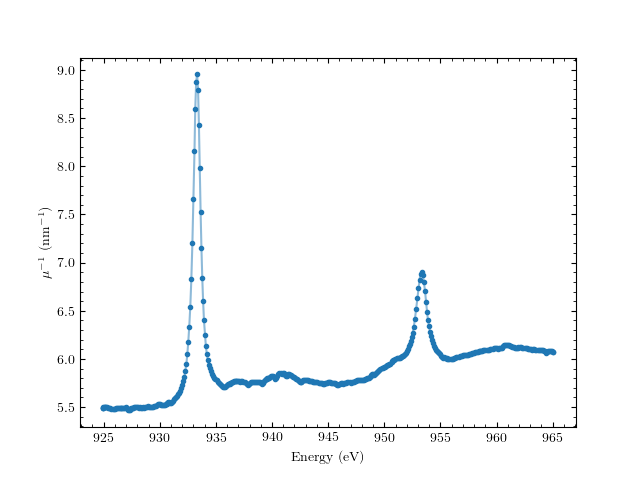

Penetration depth at peak 111.7 nm


In [3]:
myspecfile = specfile.Specfile("axes_121031_00.spec")
scan = myspecfile[595]

def get_data(scan, get_col):
    choose_cols = [i for i, col in enumerate(scan.alllabels()) if col == get_col]
    if len(choose_cols) == 1:
        col_ind = choose_cols[0]
        return scan.data()[col_ind,:]
    else:
        print("{} not found\nAvailable columns are {}".format(get_col, scan.alllabels()))

E = get_data(scan, 'ene_st')
TEY = get_data(scan, 'zratio')


pre = 1/0.182946
post = 1/ 0.164596

x = E
y = TEY - min(TEY)
y = y / np.mean(y[-1:]) * (post-pre)
y = y + pre


fig, ax = plt.subplots()
art, *_ = ax.plot(x, y, '-', alpha=0.5)
ax.plot(x, y, '.', color=art.get_color())
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("$\mu^{-1}$ (nm$^{-1$})")

print("Penetration depth at peak {:.1f} nm".format(1000/y.max()))